In [ ]:
!pip install stellargraph
# !pip install networkx==2.3

# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

1. For this task consider only the actor nodes
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files=files.upload()

Saving movie_actor_network.csv to movie_actor_network.csv


In [ ]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [ ]:
edges = [tuple(x) for x in data.values.tolist()]    #list of tuples
len(edges)

9650

In [ ]:
p=data['movie']
p

0          m1
1          m2
2          m2
3          m3
4          m3
        ...  
9645    m1380
9646    m1380
9647    m1381
9648    m1381
9649    m1381
Name: movie, Length: 9650, dtype: object

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')


In [ ]:
A=list(B.subgraph(c) for c in nx.connected_components(B))[0]
len(A)

4703

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


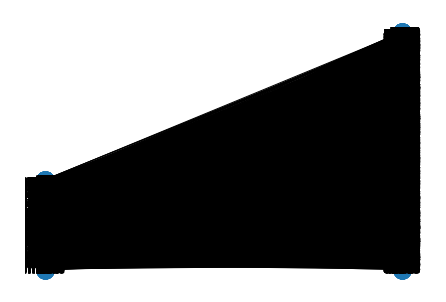

In [ ]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))
# movies
# actors

number of movies  1292
number of actors  3411


In [ ]:
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)
# model.shape

In [ ]:
model.wv.vectors[1]

array([-1.2108482 , -0.18639505,  0.10946386, -1.6808604 ,  0.80810815,
        0.45005918, -1.4147238 , -1.1811717 , -0.01252595,  0.3571136 ,
       -0.21524154, -0.35708964, -0.9914322 , -1.5250225 ,  0.15592045,
       -1.4730994 , -0.08970065, -0.6606488 , -1.2958102 ,  1.4224199 ,
       -1.2987337 ,  1.7347357 ,  1.5803597 , -2.953328  ,  0.80052537,
       -0.651071  ,  1.0370982 ,  0.2223822 ,  0.15478304, -1.2626431 ,
       -0.6896758 ,  0.888621  ,  0.13186033, -0.58672553,  0.34834355,
        0.22774012,  1.6160258 ,  1.2334663 , -1.2340325 ,  1.1735641 ,
        0.25430122, -0.15206125, -0.5673316 ,  0.6514489 ,  0.0936063 ,
       -0.37970307,  1.8950597 , -2.2328265 , -0.48217723, -0.3373085 ,
        1.8638226 ,  0.8996976 , -0.22839294,  0.36576906, -0.64160866,
        1.5667784 , -0.78988945,  0.06792061,  0.14303824,  0.43180767,
        0.6328551 , -0.35479352, -0.33991623, -1.5735146 ,  0.32751018,
        0.8391869 , -0.9387684 , -0.77049434, -0.37744048, -1.52

In [ ]:
model.wv.vectors.shape

(4703, 128)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.nodes[node_id]['label'] for node_id in node_ids]

In [ ]:
len(node_ids)

4703

In [ ]:
print (node_ids[0:15])
print(node_targets[0:15])

['a973', 'a967', 'a964', 'a1731', 'a970', 'a969', 'a1028', 'a1057', 'm1094', 'a965', 'a1003', 'm1111', 'a959', 'm67', 'a988']
['actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'movie', 'actor', 'movie', 'actor']


In [ ]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    for i in range (len(node_ids)):
      if "a" in node_ids[i]:
        actor_nodes.append(node_ids[i])
        actor_embeddings.append(node_embeddings[i])
      else:
        movie_nodes.append(node_ids[i])
        movie_embeddings.append(node_embeddings[i])
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [ ]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

**calculating cost1**

In [ ]:
Gcc = sorted(nx.connected_components(B), key=len, reverse=True)
gccp=len(Gcc[0])
gccp
# giant = max(nx.connected_component_subgraphs(B), key=len)
# giant.number_of_nodes()

4703

In [ ]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    largest_path=sorted(nx.connected_components(graph), key=len, reverse=True) #https://stackoverflow.com/questions/26105764/how-do-i-get-the-giant-component-of-a-networkx-graph
    Nodes_lar_path=len(largest_path[0])
    total_nodes=graph.number_of_nodes()

    cost1=(1/number_of_clusters)*(Nodes_lar_path/total_nodes)# calculate cost1

    return cost1

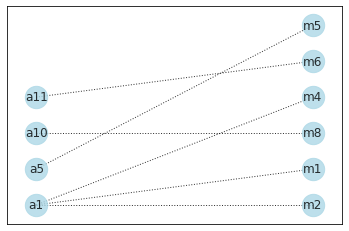

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

**Calculating cost2**

In [ ]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    graph_list=list(graph.subgraph(c) for c in nx.connected_components(graph))[0]
    no_of_edges=graph_list.number_of_edges()
    mov_nodes=0
    for i in graph_list.nodes():
      if 'm' in i:
        mov_nodes+=1
      else:
        pass

    cost2= (1/number_of_clusters)*(no_of_edges/mov_nodes) # calculate cost1

    return cost2

In [ ]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

**GROUPING OF SIMILAR ACTORS**

In [ ]:
final=[]
clusters_no=[3, 5,10,30,50,100,200,500]    #[3, 5, 10, 30, 50, 100, 200, 500]
# grouping=KMeans(n_clusters=i,random_state=0)
for i in clusters_no:
  grouping=KMeans(n_clusters=i,random_state=0)
  cost_1=0
  cost_2=0
  grouping.fit(actor_embeddings)
  label=[]
  label=list(grouping.labels_)
  # print(len(label))
  for j in range (i):
    label_actual=[]
    for k in range (len(label)):
      # label_actual=[]
      if label[k]==j:
        label_actual.append(actor_nodes[k])
      else:
        pass
    # print(len(label_actual))
    # print(label_actual)
    g=nx.Graph()
    # print(type(g))
    for l in label_actual:
      subgraph=nx.ego_graph(B,l)
      g.add_nodes_from(subgraph.nodes)
      g.add_edges_from(subgraph.edges())
    # print (type(g))
    # print(i)
    cost11=cost1(g,i)
    cost22=cost2(g,i)
    # cost_1.append(cost11)
    # cost_2.append(cost22)

    cost_1+=cost11
    cost_2+=cost22
  final_cost=cost_1*cost_2
  final.append(final_cost)
print (final)




[4.16488525824158, 3.297858433071106, 2.058582758130831, 1.8458439850312978, 1.5825263901806415, 1.953159392424419, 1.7657479853049152, 1.918898377592506]


The highest cost index is for cluster number 3
We will choose optimal number of clusters to be3

In [ ]:
best_cluster_no=3

Fitting best cluster number to the algorithm


In [ ]:
final_grouping=KMeans(n_clusters=best_cluster_no,random_state=0)
final_grouping.fit(actor_embeddings)
final_labels=final_grouping.labels_


In [ ]:
model=TSNE(n_components=2,perplexity=70,n_iter=1500)
actor_embeddings_model=model.fit_transform(actor_embeddings)


In [ ]:
actor_embeddings_model.shape

(3411, 2)

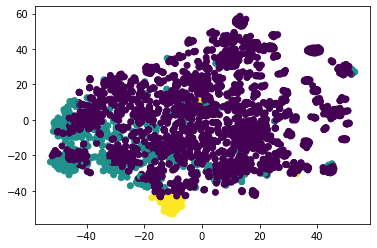

In [ ]:
gra=plt.scatter(actor_embeddings_model[:,0], actor_embeddings_model[:,1], c=final_labels)
plt.show()   #70 1500

We found out that perplexity=70 and no of iterations=1500 gives the best grouping

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>

4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$
where N= number of clusters
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>

**GROUPING OF SIMILAR MOVIES**

In [ ]:
final_mov=[]
clusters_no=[3, 5,10,30,50,100,200,500]    #[3, 5, 10, 30, 50, 100, 200, 500]
# grouping=KMeans(n_clusters=i,random_state=2)
for i in clusters_no:
  grouping=KMeans(n_clusters=i,random_state=1)
  cost_1=0
  cost_2=0
  grouping.fit(movie_embeddings)
  label=[]
  label=list(grouping.labels_)
  # print(len(label))
  for j in range (i):
    label_actual=[]
    for k in range (len(label)):
      # label_actual=[]
      if label[k]==j:
        label_actual.append(movie_nodes[k])
      else:
        pass
    # print(len(label_actual))
    # print(label_actual)
    g=nx.Graph()
    # print(type(g))
    for l in label_actual:
      subgraph=nx.ego_graph(B,l)
      g.add_nodes_from(subgraph.nodes)
      g.add_edges_from(subgraph.edges())
    # print (type(g))
    # print(i)
    cost11=cost1(g,i)
    cost22=cost2(g,i)
    # cost_1.append(cost11)
    # cost_2.append(cost22)

    cost_1+=cost11
    cost_2+=cost22
  final_cost=cost_1*cost_2
  final_mov.append(final_cost)
print (final_mov)

[8.461142534588934, 10.319668269928883, 8.810897187191257, 12.550309583576286, 14.473585254039941, 14.254052080932377, 12.72222980044209, 10.306221579385804]


The cost metric is maximum for number of clusters=50
So, we choose best cluster size=50

In [ ]:
best_cluster_no_mov=50

In [ ]:
final_grouping_mov=KMeans(n_clusters=best_cluster_no_mov,random_state=0)
final_grouping_mov.fit(movie_embeddings)
final_labels_mov=final_grouping_mov.labels_


In [ ]:
model_mov=TSNE(n_components=2,perplexity=150,n_iter=5000)
movie_embeddings_model=model_mov.fit_transform(movie_embeddings)
movie_embeddings_model.shape

(1292, 2)

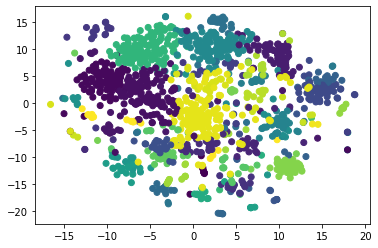

In [ ]:
plt.scatter(movie_embeddings_model[:,0], movie_embeddings_model[:,1], c=final_labels_mov)
plt.show()   #100,3000

We found out the best clustering with perplexity=150 and iterations=5000